In [1]:
import numpy as np
from numpy import argmax
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import confusion_matrix
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from imutils import paths
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.xception import Xception
from keras.layers import Conv2D, AveragePooling2D, GlobalAveragePooling2D
import cv2
import os
import sys
import random
import glob
import keras
import math

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
imagePaths_train=sorted(list(paths.list_images("lymphoma")))
random.seed(40)
random.shuffle(imagePaths_train)

In [4]:
imagePaths_train1=sorted(list(paths.list_images("lymphoma")))

In [5]:
data_train=[]
labels_train=[]
data_test=[]
labels_test=[]
data_validation=[]
labels_validation=[]


for imagePath in imagePaths_train:
    img=cv2.imread(imagePath)
    img=cv2.resize(img,(347,260)) #277,208
    data_train.append(img)
    
    label=imagePath.split(os.path.sep)[-2]
    labels_train.append(label)
print(len(data_train))

374


### Images only from 2 classes CLL and MCL are present in data_train1 as misclassifications were found out only in these 2 classes. FLL was predicted with 100% test accuracy. Later on only data_train1 can be used to train on only 2 classes of the 3.

In [6]:
data_train1=[]
labels_train1=[]
for imgpath in imagePaths_train1:
    label=imgpath.split(os.path.sep)[-2]
    if(label=='CLL' or label=='MCL'):
        img=cv2.imread(imgpath)
        img=cv2.resize(img,(347,260))
        data_train1.append(img)

        if(label=='CLL'):
            labels_train1.append(0)
        if(label=='MCL'):
            labels_train1.append(2)
print(len(data_train1))

235


In [7]:
for i in range(0,len(labels_train)):
    if(labels_train[i]=="CLL"):
        labels_train[i]=0
    if(labels_train[i]=="FL"):
        labels_train[i]=1
    if(labels_train[i]=="MCL"):
        labels_train[i]=2


In [8]:
data_train,data_test,labels_train,labels_test=train_test_split(data_train,labels_train,test_size=0.2, random_state=42)
data_train, data_validation, labels_train, labels_validation = train_test_split(data_train, labels_train, test_size=0.2, random_state=42)

In [9]:
data_train2=[]
labels_train2=[]
data_test2=[]
labels_test2=[]
data_train2, data_test2, labels_train2, labels_test2 = train_test_split(data_train1, labels_train1, test_size=0.2, random_state=42)

data_train2, data_validation2, labels_train2, labels_validation2 = train_test_split(data_train2, labels_train2, test_size=0.2, random_state=42)

print(len(data_train2))
print(len(data_validation2))
print(len(data_test2))

150
38
47


In [10]:
print("Count Train")
print(labels_train.count(0))
print(labels_train.count(1))
print(labels_train.count(2))

Count Train
86
85
68


In [11]:
print(labels_train1.count(0))
print(labels_train1.count(1))
print(labels_train1.count(2))

113
0
122


In [12]:
print("Count Test")
print(labels_test.count(0))
print(labels_test.count(1))
print(labels_test.count(2))

Count Test
14
32
29


In [13]:
print("Count Validation")
print(labels_validation.count(0))
print(labels_validation.count(1))
print(labels_validation.count(2))

Count Validation
13
22
25


In [14]:
labels_train=keras.utils.to_categorical(labels_train,3)
labels_validation=keras.utils.to_categorical(labels_validation,3)
labels_test=keras.utils.to_categorical(labels_test,3)

In [15]:
labels_train2=keras.utils.to_categorical(labels_train2,3)
labels_validation2=keras.utils.to_categorical(labels_validation2,3)
labels_test2=keras.utils.to_categorical(labels_test2,3)

In [16]:
data_train=np.asarray(data_train)
data_validation=np.asarray(data_validation)
data_test=np.asarray(data_test)

data_train = data_train.astype('float32')
data_validation = data_validation.astype('float32')
data_test = data_test.astype('float32')

In [17]:
data_validation.shape

(60, 260, 347, 3)

In [18]:
data_train2=np.asarray(data_train2)
data_validation2=np.asarray(data_validation2)
data_test2=np.asarray(data_test2)

data_train2 = data_train2.astype('float32')
data_validation2 = data_validation2.astype('float32')
data_test2 = data_test2.astype('float32')

In [19]:
data_train/=255
data_validation/=255
data_test/=255
acc=[]
val_loss =[]
loss =[]
val_acc=[]

In [20]:
data_train2/=255
data_validation2/=255
data_test2/=255
acc2=[]
val_loss2 =[]
loss2 =[]
val_acc2=[]

In [21]:
def step_decay(epoch):
    initial_lrate=0.0001
    drop=0.1
    epochs_drop=16.0
    lrate=initial_lrate * math.pow(drop,math.floor((1+epoch)/epochs_drop))
    return lrate

'\n    lrate = initial_lrate\n    if (epoch == 10) :\n        lrate = 0.00001\n    elif (epoch == 20) :\n        lrate = 0.000001\n    elif (epoch == 30) :\n        lrate = 0.0000001\n'

In [22]:
base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)

# Let's add a fully-connected layer
x = Dense(75, activation='relu')(x)

# Now a dropout layer
y = Dropout(0.3)(x)

# And a logistic layer -- let's say we have 10 classes
predictions = Dense(3, activation='softmax')(y)

model = Model(inputs=base_model.input, outputs=predictions)
print(base_model.input)
model.summary()

Tensor("input_1:0", shape=(?, ?, ?, 3), dtype=float32)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
______________________________________________________

In [23]:
data_aug = True
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001,decay = 1e-03),metrics=['accuracy'])

if not data_aug:
    print('Not using real-time data augmentation.')
    history = model.fit(data_train,labels_train,validation_data=(data_validation,labels_validation),epochs=15,batch_size=4,verbose=2,steps_per_epoch=None)
    

else:
    print('Using real-time data augmentation.')
    lr=keras.callbacks.LearningRateScheduler(step_decay,verbose=1)
   # This will do preprocessing and realtime data augmentation:
    tbCallback=keras.callbacks.TensorBoard(log_dir='./Logs/Tensorboard_Logs', histogram_freq=0, 
                                           batch_size=32, write_graph=False, write_grads=False, 
                                           write_images=False, embeddings_freq=0, embeddings_layer_names=None, 
                                           embeddings_metadata=None)
    checkpoint=keras.callbacks.ModelCheckpoint('./Logs/Checkpoint', monitor='val_loss', 
                                               verbose=0, save_best_only=False, 
                                               save_weights_only=False, 
                                               mode='auto',
                                               period=1)

    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=360,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.7,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.7,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images


#     Compute quantities required for feature-wise normalization
#     (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(data_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(data_train, labels_train,batch_size=32),steps_per_epoch=20,epochs=35, validation_data=(data_validation, labels_validation),workers=4,callbacks=[tbCallback, checkpoint,lr])

loss.append(history.history['loss'])
val_loss.append(history.history['val_loss'])
acc.append(history.history['acc'])
val_acc.append(history.history['val_acc'])

Using real-time data augmentation.
Instructions for updating:
Use the retry module or similar alternatives.
Epoch 1/35

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0001.
20/20 [==============================] - 24s 1s/step - loss: 1.0910 - acc: 0.4276 - val_loss: 0.9591 - val_acc: 0.5333
Epoch 2/35

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0001.
20/20 [==============================] - 9s 450ms/step - loss: 0.8963 - acc: 0.6018 - val_loss: 0.8967 - val_acc: 0.6000
Epoch 3/35

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0001.
20/20 [==============================] - 9s 472ms/step - loss: 0.6772 - acc: 0.7266 - val_loss: 0.8312 - val_acc: 0.6333
Epoch 4/35

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0001.
20/20 [==============================] - 9s 460ms/step - loss: 0.5787 - acc: 0.7696 - val_loss: 0.5092 - val_acc: 0.7667
Epoch 5/35

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0001.
20/20

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras import backend as K
import numpy as np
img=data_train[4]            #pass any sample image for which we have to find features
img=np.expand_dims(img,axis=0)                      #expand the dimensions
def layer_to_visualize(layer):
    inputs = [K.learning_phase()] + model.inputs

    _convout1_f = K.function(inputs, [layer.output])
    def convout1_f(X):
     # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img)
    convolutions = np.squeeze(convolutions)
    print ('Shape of conv:', convolutions.shape)
    
    n = convolutions.shape[0]
    n = int(np.ceil(np.sqrt(n)))
    print(convolutions.shape)
    
    
    fig = plt.figure(figsize=(12,8))
    for i in range(len(convolutions)):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[i])#, cmap='gray')
       
    return convolutions


Shape of conv: (129, 173, 32)
(129, 173, 32)
Shape of conv: (129, 173, 32)
(129, 173, 32)
Shape of conv: (127, 171, 32)
(127, 171, 32)
Shape of conv: (14, 20, 384)
(14, 20, 384)
Shape of conv: (14, 20, 96)
(14, 20, 96)


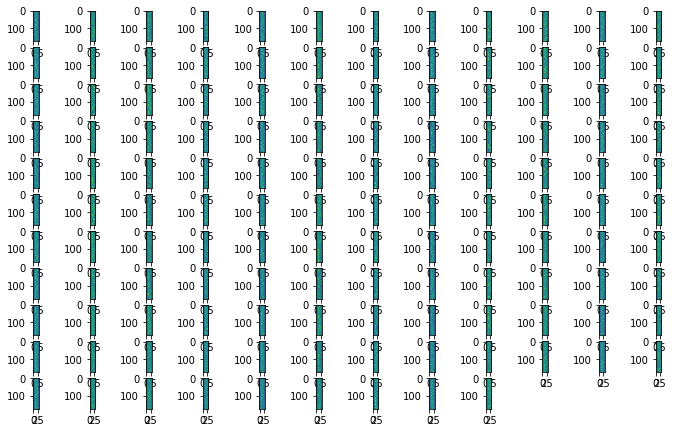

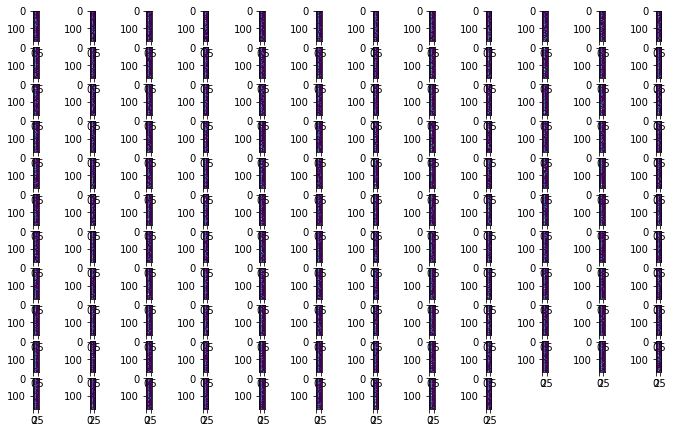

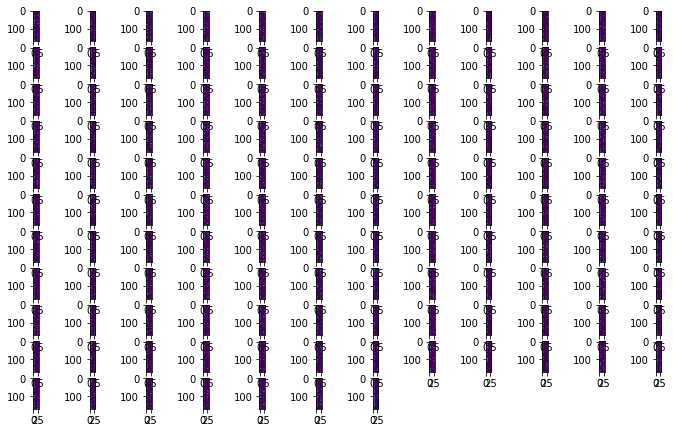

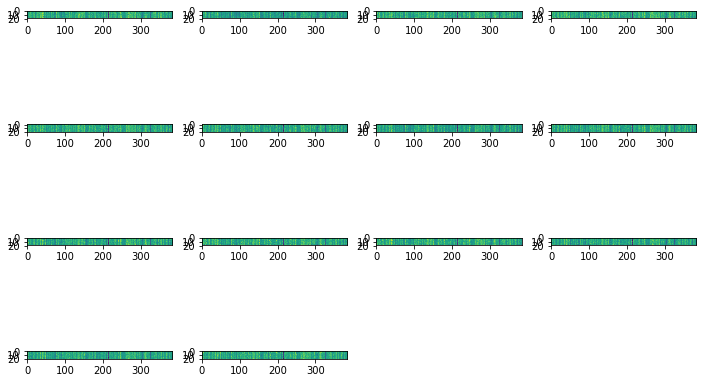

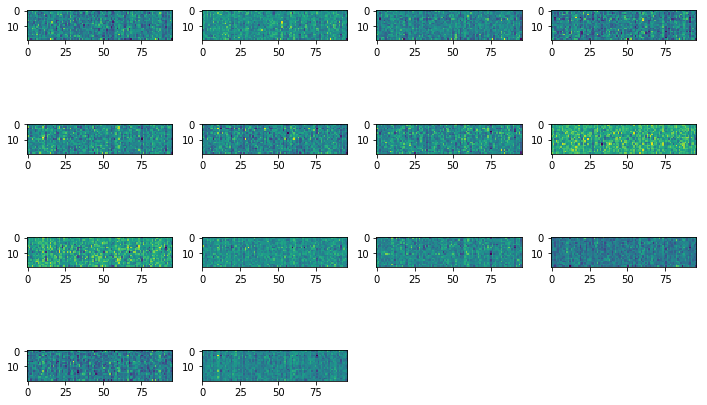

In [25]:
#Visualization of conv layers on activation relu
f1=layer_to_visualize(model.layers[1])
f2=layer_to_visualize(model.layers[3])
f3=layer_to_visualize(model.layers[6])
f4=layer_to_visualize(model.layers[93])
f5=layer_to_visualize(model.layers[94])

(2, 173, 32)


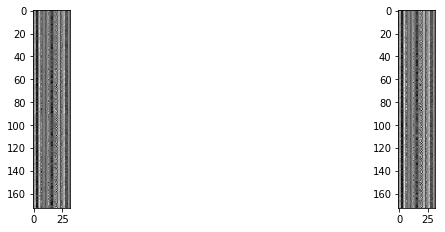

In [26]:
convolutions=f1[0:2]
n = convolutions.shape[0]
n = int(np.ceil(np.sqrt(n)))
print(convolutions.shape)
    
    
fig = plt.figure(figsize=(12,8))
for i in range(len(convolutions)):
    ax = fig.add_subplot(n,n,i+1)
    ax.imshow(convolutions[i],cmap='gray')

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<function matplotlib.pyplot.show>

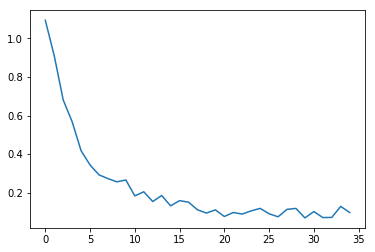

In [29]:
y=history.history['loss']
x=range(0,35)
plt.plot(x,y)
plt.show

In [30]:
import itertools
score=model.evaluate(data_test,labels_test,verbose=2)
print(score[0])
print(score[1])
cm=confusion_matrix(np.argmax(labels_test,axis=1), np.argmax(model.predict(data_test),axis=1))


0.1642627677631875
0.9733333333333334


Confusion matrix, without normalization
[[13  0  1]
 [ 0 31  1]
 [ 0  0 29]]


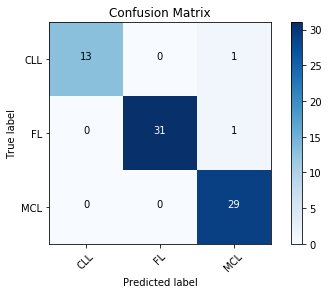

In [31]:
#import itertools
cm_plot_labels=["CLL","FL","MCL"]
plot_confusion_matrix(cm, cm_plot_labels, title="Confusion Matrix")

In [ ]:
model_json = model.to_json()
with open("model_final_973.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final_973.h5")
print("Saved model to disk")